# ML model performance comparison

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [75]:
def _unstring_list(stringed_list):
    res = stringed_list.strip("][")
    res = [float(x.strip()) for x in res.split(" ") if x != '']
    return res

In [84]:
def _group_f1_per_tissue(nested_list, labels_f1):
    
    f1_per_tissue = {label: [] for label in labels_f1}
    for cv in range(10):
        for index, label_f1 in enumerate(labels_f1):
            f1_per_tissue[label_f1].append(nested_list[cv][index])
    return f1_per_tissue

In [85]:
def parse_boxplot_data(results_dataset, labels_f1):
    '''
    the results_dataset should contain #cv stringatized lists of f1_scores with each element the score of a label.
    
    The function returns a dataframe with 3 columns: tissue_type, f1_scores, algorithm
    
    This can directly be used as input to make boxplots.'''

    algos = results_dataset.algorithm.unique()
    # turn raw results table into dictionary {alg1: [f1_tissue_cv1, f1_tissue_cv2 , ..., f1_tissue_cvx], alg2: ...}
    base_f1 = {alg : [] for alg in algos}
    for alg in algos:
        for f1 in results_dataset[results_dataset.algorithm == alg].f1:
            base_f1[alg].append(_unstring_list(f1))

    final_df = pd.DataFrame(columns = ["tissue_type", "f1", "algorithm"])
    
    for algo, nested_list in base_f1.items():

        f1_grouped = _group_f1_per_tissue(nested_list=nested_list, labels_f1=labels_f1)
        df_f1 = pd.DataFrame.from_dict(f1_grouped)
        df_f1 = df_f1.melt(var_name="tissue_type", value_name="f1")
        df_f1["algorithm"] = algo
    
        final_df = pd.concat([final_df, df_f1], axis = 0)

    return final_df

In [79]:
base_results = pd.read_csv("base_results.csv", sep = ";").rename(columns = {"Unnamed: 0": "algorithm"})

In [80]:
labels_f1 = ['breast',
 'blood',
 'brain',
 'ovary',
 'cervix',
 'umbilical vein',
 'colon',
 'skin',
 'kidney',
 'trophoblast',
 'liver']

In [87]:
parsed_boxplot_data = parse_boxplot_data(base_results, labels_f1=labels_f1)

In [88]:
parsed_boxplot_data.head()

,tissue_type,f1,algorithm
0,breast,0.842105,rf
1,breast,0.842105,rf
2,breast,1.000000,rf
3,breast,0.545455,rf
4,breast,0.857143,rf


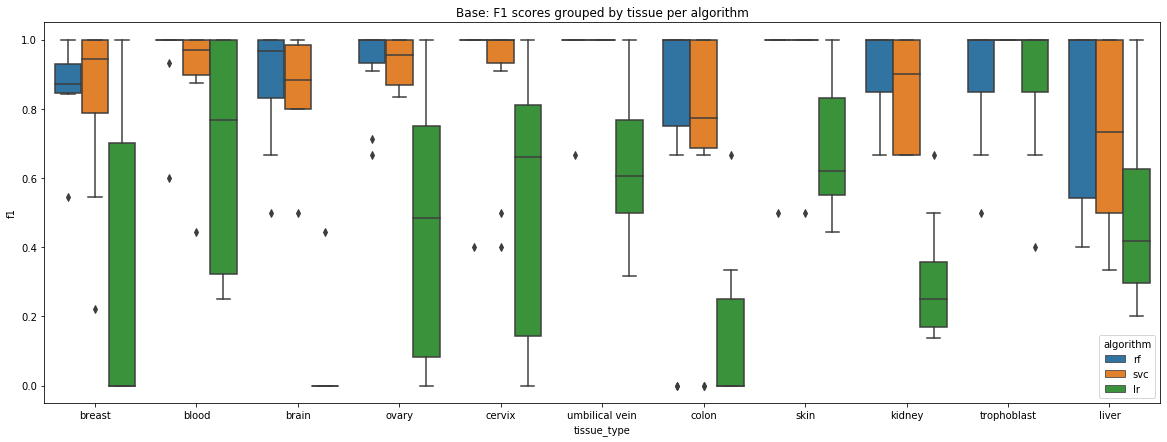

In [95]:
plt.figure(figsize=(20,7))
plt.title("Base: F1 scores grouped by tissue per algorithm")
sns.boxplot(data = parsed_boxplot_data, x = "tissue_type", y = "f1", hue = "algorithm", orient = "vertical")